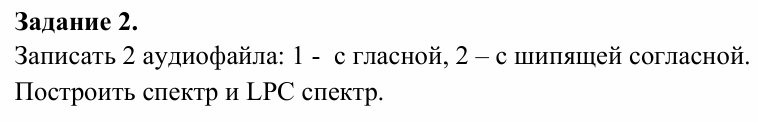

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

from scipy.signal import freqz

# Librosa

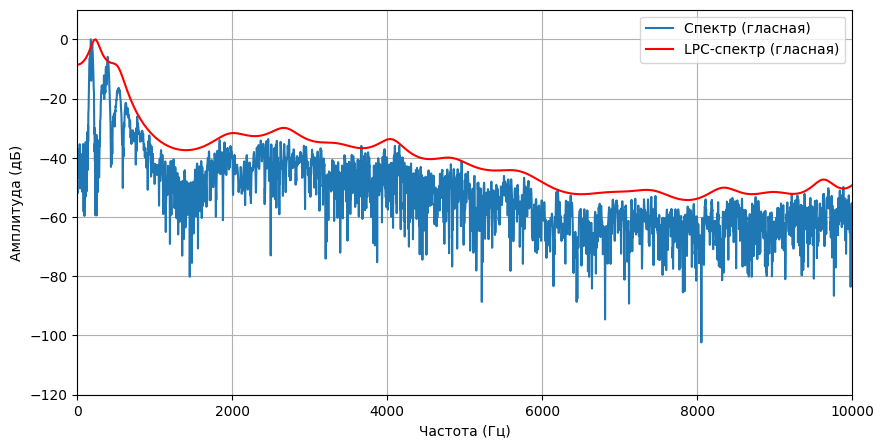

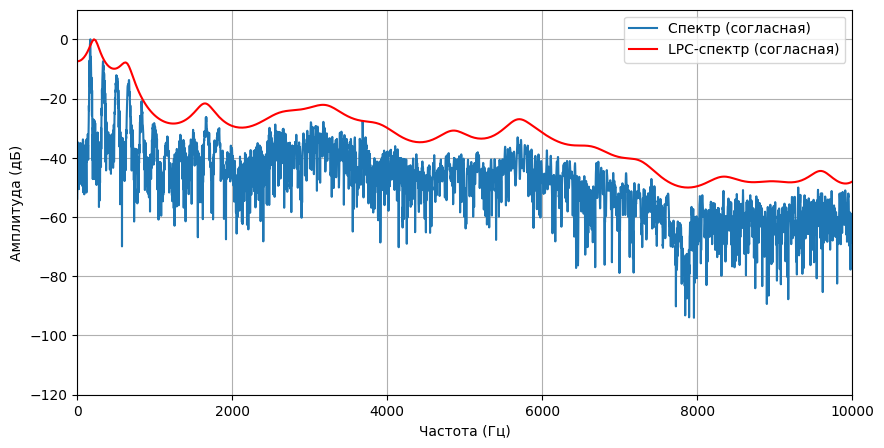

In [ ]:
def calculate_fft_spectrum(signal, sample_rate):
    n = len(signal)
    spectrum = np.fft.fft(signal, n=n)[:n//2]
    frequencies = np.fft.fftfreq(n, d=1/sample_rate)[:n//2]

    fft_db = 20 * np.log10(np.abs(spectrum) / np.max(np.abs(spectrum)))

    return frequencies, fft_db

def calculate_lpc_spectrum(signal, sample_rate, order=32):
    signal_lpc = librosa.lpc(signal, order=order)
    w_lpc, h_lpc = freqz(1, signal_lpc, worN=512, fs=sample_rate)

    lpc_db = 20 * np.log10(np.abs(h_lpc) / np.max(np.abs(h_lpc)))

    return w_lpc, lpc_db

def plot_spectrums(frequencies, fft_db, w_lpc, lpc_db, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, fft_db, label=title1)
    plt.plot(w_lpc, lpc_db, label=title2, color='r')
    plt.xlim(0, 10000)
    plt.ylim(-120, 10)
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплитуда (дБ)')
    plt.legend()
    plt.grid()
    plt.show()

order_lpc = 32
vowel, sr1 = librosa.load('vowel.mp3')
consonant, sr2 = librosa.load('consonant.mp3')

freqs_vowel, fft_db_vowel = calculate_fft_spectrum(vowel, sr1)
freqs_consonant, fft_db_consonant = calculate_fft_spectrum(consonant, sr2)

w_lpc_vowel, lpc_db_vowel = calculate_lpc_spectrum(vowel, sr1, order_lpc)
w_lpc_consonant, lpc_db_consonant = calculate_lpc_spectrum(consonant, sr2, order_lpc)

plot_spectrums(freqs_vowel, fft_db_vowel, w_lpc_vowel, lpc_db_vowel, 'Спектр (гласная)', 'LPC-спектр (гласная)')
plot_spectrums(freqs_consonant, fft_db_consonant, w_lpc_consonant, lpc_db_consonant, 'Спектр (согласная)', 'LPC-спектр (согласная)')

# Own LPC

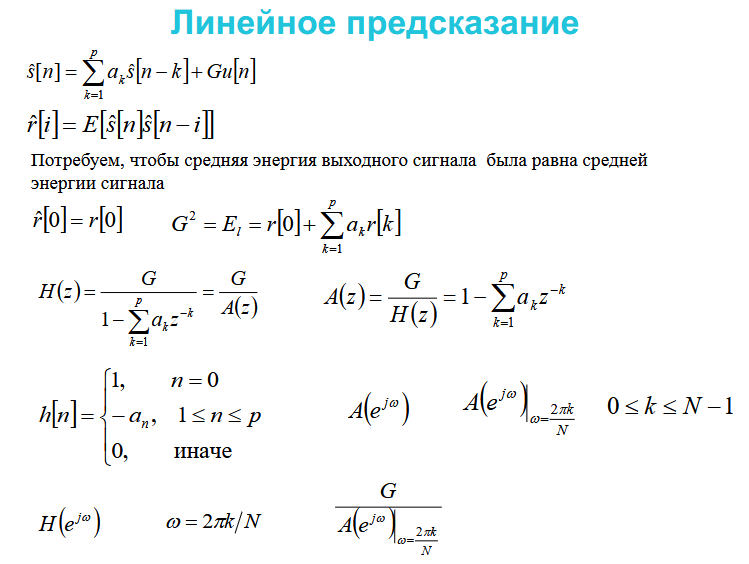

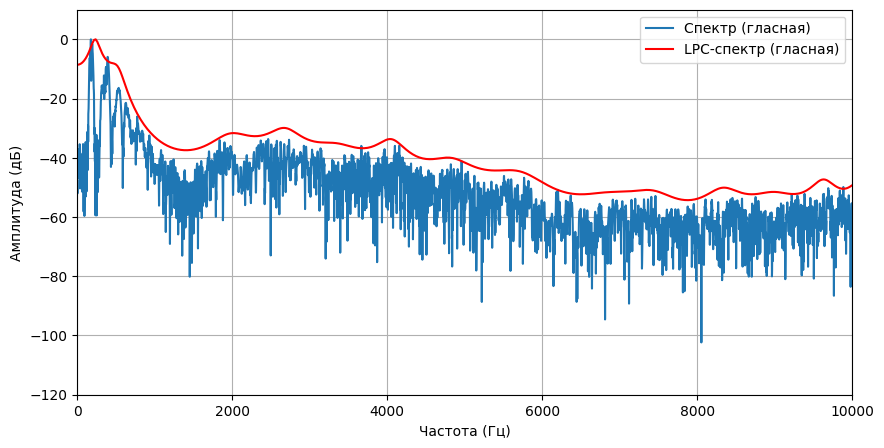

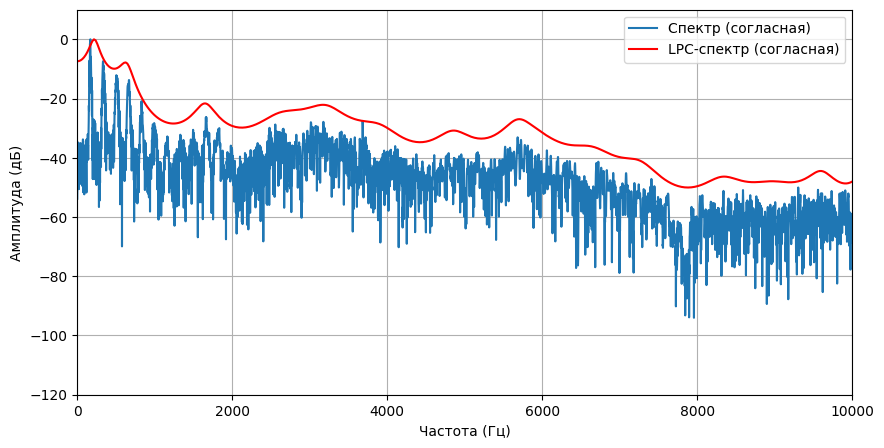

In [ ]:
def lpc(signal, order):
    r = [np.correlate(signal, signal, mode='full')[len(signal) - 1 + i] for i in range(order + 1)]
    R = np.zeros((order, order))
    for i in range(order):
        for j in range(order):
            R[i, j] = r[abs(i - j)]

    a = np.linalg.solve(R, -np.array(r[1:]))
    a = np.insert(a, 0, 1)

    G2 = r[0] + np.sum(a[1:] * r[1:])
    G = np.sqrt(G2)

    return a, G

def calculate_fft_spectrum(signal, sample_rate):
    n = len(signal)
    spectrum = np.fft.fft(signal, n=n)[:n//2]
    frequencies = np.fft.fftfreq(n, d=1/sample_rate)[:n//2]

    fft_db = 20 * np.log10(np.abs(spectrum) / np.max(np.abs(spectrum)))

    return frequencies, fft_db

def calculate_lpc_spectrum(signal, sample_rate, order=16):
    a, G = lpc(signal, order)

    w_lpc = np.linspace(0, sample_rate / 2, 512, endpoint=False)
    h_lpc = np.zeros_like(w_lpc, dtype=np.complex128)
    for i, w in enumerate(w_lpc):
        z = np.exp(-1j * 2 * np.pi * w / sample_rate)
        h_lpc[i] = G / (1 + np.sum([a[j] * (z ** j) for j in range(1, len(a))]))

    lpc_db = 20 * np.log10(np.abs(h_lpc) / np.max(np.abs(h_lpc)))

    return w_lpc, lpc_db

def plot_spectrums(frequencies, fft_db, w_lpc, lpc_db, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, fft_db, label=title1)
    plt.plot(w_lpc, lpc_db, label=title2, color='r')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплитуда (дБ)')
    plt.xlim(0, 10000)
    plt.ylim(-120, 10)
    plt.legend()
    plt.grid()
    plt.show()

order_lpc = 32
vowel, sr1 = librosa.load('vowel.mp3')
consonant, sr2 = librosa.load('consonant.mp3')

freqs_vowel, fft_db_vowel = calculate_fft_spectrum(vowel, sr1)
freqs_consonant, fft_db_consonant = calculate_fft_spectrum(consonant, sr2)

w_lpc_vowel, lpc_db_vowel = calculate_lpc_spectrum(vowel, sr1, order_lpc)
w_lpc_consonant, lpc_db_consonant = calculate_lpc_spectrum(consonant, sr2, order_lpc)

plot_spectrums(freqs_vowel, fft_db_vowel, w_lpc_vowel, lpc_db_vowel, 'Спектр (гласная)', 'LPC-спектр (гласная)')
plot_spectrums(freqs_consonant, fft_db_consonant, w_lpc_consonant, lpc_db_consonant, 'Спектр (согласная)', 'LPC-спектр (согласная)')